## Data inspection of the real propecty sales file

File name: Real Property Sales <br> 
Location: Documents/Data Science/Fatiron School/week3/

## Step 1: Inspecting the files content

In [1]:
## Import pandas and inspect the content of the data using a DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from scipy import stats

In [2]:
sales_df = pd.read_csv('raw_data/Real Property Sales.zip')
sales_df.head()

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2687551,138860,110,08/21/2014,245000,20140828001436,,,,,...,3,6,3,N,N,N,N,1,8,
1,1235111,664885,40,07/09/1991,0,199203161090,071,001,664885,C,...,3,0,26,N,N,N,N,18,3,11
2,2704079,423943,50,10/11/2014,0,20141205000558,,,,,...,3,6,15,N,N,N,N,18,8,18 31 51
3,2584094,403700,715,01/04/2013,0,20130110000910,,,,,...,3,6,15,N,N,N,N,11,8,18 31 38
4,1056831,951120,900,04/20/1989,85000,198904260448,117,053,951120,P,...,3,0,2,N,N,N,N,1,9,49


In [3]:
bldg_df = pd.read_csv('raw_data/Residential Building.zip')
bldg_df.head()

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,520,67,1,1,6781 MARS AVE S 98108,6781,,,MARS,AVE,...,1,0,1,1940,2014,0,0,0,3,0
1,640,7,1,1,45216 196TH AVE SE 98022,45216,,,196TH,AVE,...,1,0,0,1961,0,0,0,0,4,0
2,640,16,1,1,20410 SE 456TH WAY 98022,20410,,SE,456TH,WAY,...,0,0,0,2004,0,0,0,0,3,0
3,660,96,1,1,8501 S 259TH ST 98030,8501,,S,259TH,ST,...,0,0,0,1933,0,0,0,0,4,0
4,720,13,1,1,84 LOGAN AVE S 98055,84,,,LOGAN,AVE,...,0,0,0,1924,0,0,0,0,3,0


In [4]:
parcel_df = pd.read_csv('raw_data/Parcels_for_King_County_with_Address_with_Property_Information__parcel_address_area.csv', encoding='latin-1')
parcel_df.head()

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,17,44,45,46,52,53,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,MAJOR,MINOR,PIN,COMMENTS,SITETYPE,SITEID,ADDR_HN,ADDR_PD,ADDR_PT,...,PROPTYPE,ALIAS1,ALIAS2,KCA_ZONING,KCA_ACRES,LEGALDESC,PREUSE_CODE,PREUSE_DESC,Shape_Length,Shape_Area
0,1,20,0001,0000200001,NaN,NaN,NaN,NaN,NaN,NaN,...,C,NaN,NaN,M2,8.419995,HENRY ADAMS DONATION CLAIM NO 43 PORTION HENRY...,332.0,"Right of Way/Utility, Road ...",4889.930132,367602.325773
1,2,20,0003,0000200003,NaN,NaN,NaN,NaN,NaN,NaN,...,C,NaN,NaN,GC-MU,0.123967,ADAMS HENRY-D C # 43 PORTION OF E 1/2 OF NW 1/...,316.0,Vacant(Industrial) ...,330.703714,5453.966925
2,3,20,0006,0000200006,ALI fallout,R1,604745.0,7211,S,NaN,...,C,NaN,NaN,GC-MU,0.137994,ADAMS HENRY-D C # 43 W 50 FT OF E...,106.0,Office Building ...,340.002037,6000.064501
3,4,20,0007,0000200007,NaN,C1,600178.0,7209,S,NaN,...,C,NaN,NaN,GC-MU,0.165289,ADAMS HENRY-D C # 43 W 60 FT OF E...,106.0,Office Building ...,360.002087,7200.080078
4,5,20,0008,0000200008,NaN,NaN,NaN,NaN,NaN,NaN,...,C,NaN,NaN,GC-MU,0.136524,ADAMS HENRY-D C # 43 W 60 FT OF E...,309.0,Vacant(Commercial) ...,317.359849,6068.041700


In [5]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 24 columns):
ExciseTaxNbr          int64
Major                 object
Minor                 object
DocumentDate          object
SalePrice             int64
RecordingNbr          object
Volume                object
Page                  object
PlatNbr               object
PlatType              object
PlatLot               object
PlatBlock             object
SellerName            object
BuyerName             object
PropertyType          int64
PrincipalUse          int64
SaleInstrument        int64
AFForestLand          object
AFCurrentUseLand      object
AFNonProfitUse        object
AFHistoricProperty    object
SaleReason            int64
PropertyClass         int64
SaleWarning           object
dtypes: int64(7), object(17)
memory usage: 372.3+ MB


In [6]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512548 entries, 0 to 512547
Data columns (total 50 columns):
Major                 512548 non-null int64
Minor                 512548 non-null int64
BldgNbr               512548 non-null int64
NbrLivingUnits        512548 non-null int64
Address               512548 non-null object
BuildingNumber        512548 non-null object
Fraction              512548 non-null object
DirectionPrefix       511984 non-null object
StreetName            512548 non-null object
StreetType            512548 non-null object
DirectionSuffix       511984 non-null object
ZipCode               468452 non-null object
Stories               512548 non-null float64
BldgGrade             512548 non-null int64
BldgGradeVar          512548 non-null int64
SqFt1stFloor          512548 non-null int64
SqFtHalfFloor         512548 non-null int64
SqFt2ndFloor          512548 non-null int64
SqFtUpperFloor        512548 non-null int64
SqFtUnfinFull         512548 non-null int64

## Step 2: Reducing the data frames to include the relevant factors

In [7]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice', 'PrincipalUse']]
sales_df.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse
0,138860,110,08/21/2014,245000,6
1,664885,40,07/09/1991,0,0
2,423943,50,10/11/2014,0,6
3,403700,715,01/04/2013,0,6
4,951120,900,04/20/1989,85000,0


In [8]:
bldg_df = bldg_df[['Major', 'Minor', 'ZipCode', 'BldgGrade', 'SqFtTotLiving', 'Bedrooms', 'BathHalfCount'
                   , 'Bath3qtrCount', 'BathFullCount', 'YrBuilt', 'YrRenovated']]
bldg_df.head()

,Major,Minor,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated
0,520,67,98108,7,2360,3,0,1,2,1940,2014
1,640,7,98022,6,1770,3,1,0,1,1961,0
2,640,16,98022,9,2720,3,1,0,3,2004,0
3,660,96,98030,7,1360,4,0,0,1,1933,0
4,720,13,98055,6,1270,3,0,0,1,1924,0


In [9]:
parcel_df = parcel_df[['MAJOR', 'MINOR', 'LON', 'LAT']]
parcel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618575 entries, 0 to 618574
Data columns (total 4 columns):
MAJOR    618575 non-null int64
MINOR    618575 non-null object
LON      559056 non-null float64
LAT      559056 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 18.9+ MB


## Step 3: Merging the data frames together

In [10]:
sales_df['Major'] = pd.to_numeric(sales_df['Major'], errors='coerce')

In [11]:
sales_df['Minor'] = pd.to_numeric(sales_df['Minor'], errors='coerce')

In [12]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2033420 entries, 0 to 2033419
Data columns (total 5 columns):
Major           float64
Minor           float64
DocumentDate    object
SalePrice       int64
PrincipalUse    int64
dtypes: float64(2), int64(2), object(1)
memory usage: 77.6+ MB


In [13]:
parcel_df = parcel_df.rename(columns={'MAJOR': 'Major', 'MINOR': 'Minor'})

In [14]:
parcel_df['Major'] = pd.to_numeric(parcel_df['Major'], errors='coerce')

In [15]:
parcel_df['Minor'] = pd.to_numeric(parcel_df['Minor'], errors='coerce')

In [16]:
parcel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618575 entries, 0 to 618574
Data columns (total 4 columns):
Major    618575 non-null int64
Minor    611023 non-null float64
LON      559056 non-null float64
LAT      559056 non-null float64
dtypes: float64(3), int64(1)
memory usage: 18.9 MB


In [17]:
sales_data_temp = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [18]:
sales_data = pd.merge(sales_data_temp, parcel_df, on=['Major', 'Minor'])

In [19]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,LON,LAT
0,138860.0,110.0,08/21/2014,245000,6,98002,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
1,138860.0,110.0,06/12/1989,109300,0,98002,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
2,138860.0,110.0,01/16/2005,14684,6,98002,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
3,138860.0,110.0,06/08/2005,0,0,98002,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
4,423943.0,50.0,10/11/2014,0,6,98092,6,960,3,0,0,1,1969,0,-122.179101,47.316809


## Step 4: Data cleaning

<b> Step 4.1 :  Look for nulls and decide on their outcome

In [20]:
sales_data.isna().any()

Major            False
Minor            False
DocumentDate     False
SalePrice        False
PrincipalUse     False
ZipCode           True
BldgGrade        False
SqFtTotLiving    False
Bedrooms         False
BathHalfCount    False
Bath3qtrCount    False
BathFullCount    False
YrBuilt          False
YrRenovated      False
LON               True
LAT               True
dtype: bool

So far we have found that ZipCode contains null values, so we are going to investigate that column further

In [21]:
sales_data['ZipCode'].unique()

array(['98002', '98092', '98008', '98058', '98038', '98031', '98188',
       '98051', '98001', 98001.0, '98177', '98072', '98106', nan, '98059',
       98125.0, 98006.0, '98144', '98006', '98040', '98070', '98155',
       '98045', '98133', '98118', 98105.0, '98056', '98102', '98042',
       '98053', '98199', '98168', '98027', '98011', '98115', '98074',
       '98003', '98146', '98024', '98117', '98029', '98005', '98028',
       '98103', '98034', '98030', '98032', '98039', '98075', '98022',
       '98108', '98198', 98115.0, '98065', '98105', '98166', 98074.0,
       '98136', '98125', '98023', '98004', '98055', '98033', '98077',
       '98119', '98122', '98116', '98052', 98136.0, '98112', '98007',
       '98107', '98010', 98038.0, 98103.0, 98019.0, '98014', 98055.0,
       '98019', '98178', 98059.0, 98008.0, 98024.0, 98023.0, 98106.0,
       98122.0, 98031.0, '98126', 98117.0, '98148', 98030.0, 98034.0,
       '98047', '98288', '98109', 98052.0, 98003.0, 98011.0, '98224',
       98133.0,

Apart from the null values, there are string values that don't relate to particular ZipCodes (ie. 0, A, B, WA). Given that the data is categorical, we are going to turn these values into nulls and the zip codes.

In [22]:
def clean_zips(x):
    x = str(x)
    if len(x) >= 5 and x[:2] == '98':
        x = x[:5]
        return int(x)
    else:
        return np.nan

sales_data['ZipCode'] = sales_data['ZipCode'].apply(clean_zips)
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,LON,LAT
0,138860.0,110.0,08/21/2014,245000,6,98002.0,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
1,138860.0,110.0,06/12/1989,109300,0,98002.0,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
2,138860.0,110.0,01/16/2005,14684,6,98002.0,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
3,138860.0,110.0,06/08/2005,0,0,98002.0,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
4,423943.0,50.0,10/11/2014,0,6,98092.0,6,960,3,0,0,1,1969,0,-122.179101,47.316809


In [23]:
sales_data['ZipCode'].isna().sum()

118295

In [24]:
sales_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]

In [25]:
sales_data['LON'].isna().sum()

2469

In [26]:
sales_data['LAT'].isna().sum()

2469

Given that the number of properties without Longitude and Latitude are ignisificant in the grand scheme, we will eliminate them

In [27]:
sales_data = sales_data.loc[~sales_data['LAT'].isna(), :]

In [28]:
sales_data = sales_data.loc[~sales_data['LON'].isna(), :]

<b> Step 4.2 :  Drop rows with invalid values in the SalePrice, SqFtTotLiving, Bedrooms, BathFullCount columns.

In [29]:
sales_data = sales_data.loc[~(sales_data['SalePrice'] <= 0), :]

In [30]:
sales_data = sales_data.loc[~(sales_data['SqFtTotLiving'] == 0), :]

<b> Step 4.3 :  Subseting the SalePrice for our model to reflect best the sale price of a house for an average customer more accurately.

In [31]:
lowest = np.percentile(sales_data['SalePrice'],5)
highest = np.percentile(sales_data['SalePrice'],95)

In [32]:
sales_data = sales_data[sales_data['SalePrice'] > lowest]
sales_data = sales_data[sales_data['SalePrice'] < highest]

<b> Step 4.4 : Drop properties whose principal use is not either Residential, Condominiums, Apartments and Mobile Homes

In [33]:
a = [0, 2, 4, 6, 8]
sales_data = sales_data[sales_data['PrincipalUse'].isin(a)]

In [34]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,PrincipalUse,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,YrRenovated,LON,LAT
0,138860.0,110.0,08/21/2014,245000,6,98002.0,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
1,138860.0,110.0,06/12/1989,109300,0,98002.0,7,1490,3,0,0,2,1989,0,-122.218320,47.287513
6,423943.0,50.0,07/15/1999,96000,6,98092.0,6,960,3,0,0,1,1969,0,-122.179101,47.316809
7,423943.0,50.0,01/08/2001,127500,6,98092.0,6,960,3,0,0,1,1969,0,-122.179101,47.316809
11,403700.0,715.0,07/03/2013,464500,6,98008.0,7,1780,4,0,1,1,1957,0,-122.116832,47.603107


In [35]:
sales_data.drop("PrincipalUse", axis=1, inplace=True)## Dropping PrincipalUse column since it is no longer useful

<b> Step 4.5 : Drop BathHalfCount and Bath3qrtCount given that a merge of these fields would lead to an inacurrate predictor

In [36]:
sales_data.drop(columns=['BathHalfCount', 'Bath3qtrCount'], axis=1, inplace=True)

<b> Step 4.6 : Find out the number of years the house has been built.

In [37]:
sales_data['DocumentDate'] = sales_data['DocumentDate'].apply(pd.Timestamp)

In [38]:
sales_data['Year'] = sales_data['DocumentDate'].apply(lambda ts: ts.year)

In [39]:
sales_data['AgeofHouse'] = sales_data['Year'] - sales_data['YrBuilt']

<b> Step 5.6: Checking for outliers

<b> 5.6.1: Bedroom outliers

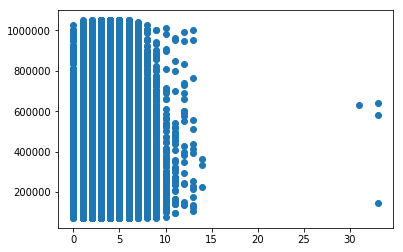

In [40]:
plt.scatter(sales_data['Bedrooms'],sales_data['SalePrice'])

In [41]:
sales_data['Bedrooms'].mean()

3.3779112557287596

In [42]:
highest = np.percentile(sales_data['Bedrooms'],95)

In [43]:
highest

5.0

In [44]:
sales_data = sales_data.loc[~(sales_data['Bedrooms'] > 5), :]

<b> 5.6.2: Bathroom outliers

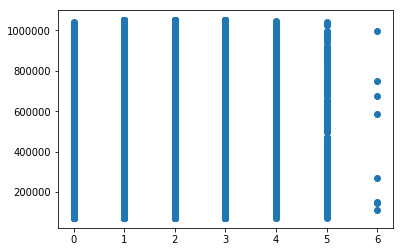

In [45]:
plt.scatter(sales_data['BathFullCount'],sales_data['SalePrice'])

In [46]:
sales_data['BathFullCount'].mean()

1.520508255392374

In [47]:
highest = np.percentile(sales_data['BathFullCount'],95)

In [48]:
highest

3.0

In [49]:
sales_data = sales_data.loc[~(sales_data['BathFullCount'] > 3), :]

In [50]:
sales_data

,Major,Minor,DocumentDate,SalePrice,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,LON,LAT,Year,AgeofHouse
0,138860.0,110.0,2014-08-21,245000,98002.0,7,1490,3,2,1989,0,-122.218320,47.287513,2014,25
1,138860.0,110.0,1989-06-12,109300,98002.0,7,1490,3,2,1989,0,-122.218320,47.287513,1989,0
6,423943.0,50.0,1999-07-15,96000,98092.0,6,960,3,1,1969,0,-122.179101,47.316809,1999,30
7,423943.0,50.0,2001-01-08,127500,98092.0,6,960,3,1,1969,0,-122.179101,47.316809,2001,32
11,403700.0,715.0,2013-07-03,464500,98008.0,7,1780,4,1,1957,0,-122.116832,47.603107,2013,56
12,403700.0,715.0,2013-02-21,357000,98008.0,7,1780,4,1,1957,0,-122.116832,47.603107,2013,56
13,403700.0,715.0,1995-10-13,142000,98008.0,7,1780,4,1,1957,0,-122.116832,47.603107,1995,38
14,403700.0,715.0,2007-02-22,528000,98008.0,7,1780,4,1,1957,0,-122.116832,47.603107,2007,50
16,98400.0,380.0,1994-03-23,139950,98058.0,7,2050,4,1,1967,0,-122.170634,47.433758,1994,27
17,98400.0,380.0,2017-03-29,439500,98058.0,7,2050,4,1,1967,0,-122.170634,47.433758,2017,50


<b>Step 5.7: Re-checking for nulls

In [51]:
sales_data.isna().any()

Major            False
Minor            False
DocumentDate     False
SalePrice        False
ZipCode          False
BldgGrade        False
SqFtTotLiving    False
Bedrooms         False
BathFullCount    False
YrBuilt          False
YrRenovated      False
LON              False
LAT              False
Year             False
AgeofHouse       False
dtype: bool

## Step 6: Data Engineering

In [52]:
sales_data['lat_long'] = sales_data['LON'] * sales_data['LAT']

In [53]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,LON,LAT,Year,AgeofHouse,lat_long
0,138860.0,110.0,2014-08-21,245000,98002.0,7,1490,3,2,1989,0,-122.218320,47.287513,2014,25,-5779.400423
1,138860.0,110.0,1989-06-12,109300,98002.0,7,1490,3,2,1989,0,-122.218320,47.287513,1989,0,-5779.400423
6,423943.0,50.0,1999-07-15,96000,98092.0,6,960,3,1,1969,0,-122.179101,47.316809,1999,30,-5781.125227
7,423943.0,50.0,2001-01-08,127500,98092.0,6,960,3,1,1969,0,-122.179101,47.316809,2001,32,-5781.125227
11,403700.0,715.0,2013-07-03,464500,98008.0,7,1780,4,1,1957,0,-122.116832,47.603107,2013,56,-5813.140661


## Step 7: Running correlation between predictors and target variable

In [54]:
sales_data.corr()

,Major,Minor,SalePrice,ZipCode,BldgGrade,SqFtTotLiving,Bedrooms,BathFullCount,YrBuilt,YrRenovated,LON,LAT,Year,AgeofHouse,lat_long
Major,1.000000,-0.294402,0.012544,-0.004790,0.010475,-0.011890,0.007565,0.014150,0.013182,-0.018527,0.004088,0.003521,0.006439,-0.010786,-0.001816
Minor,-0.294402,1.000000,0.007737,-0.002924,-0.021108,0.046893,-0.039860,-0.011779,-0.027528,0.052179,0.088817,-0.052023,0.007358,0.028657,0.076792
SalePrice,0.012544,0.007737,1.000000,-0.015667,0.419113,0.401447,0.191669,0.230026,0.113272,0.046590,0.075118,0.234124,0.560754,0.056293,-0.187207
ZipCode,-0.004790,-0.002924,-0.015667,1.000000,-0.187366,-0.171662,-0.143502,-0.123267,-0.379901,0.071813,-0.511773,0.280884,0.034343,0.375667,-0.425794
BldgGrade,0.010475,-0.021108,0.419113,-0.187366,1.000000,0.751285,0.384528,0.450576,0.446798,0.003892,0.223269,0.137592,-0.081575,-0.453957,-0.050097
SqFtTotLiving,-0.011890,0.046893,0.401447,-0.171662,0.751285,1.000000,0.578998,0.518478,0.347075,0.060972,0.225917,0.077176,-0.065438,-0.353247,0.005559
Bedrooms,0.007565,-0.039860,0.191669,-0.143502,0.384528,0.578998,1.000000,0.388243,0.219191,0.002393,0.128786,-0.012244,-0.018827,-0.216457,0.054174
BathFullCount,0.014150,-0.011779,0.230026,-0.123267,0.450576,0.518478,0.388243,1.000000,0.392353,0.046698,0.177823,0.002069,-0.000697,-0.377731,0.057555
YrBuilt,0.013182,-0.027528,0.113272,-0.379901,0.446798,0.347075,0.219191,0.392353,1.000000,-0.234423,0.433643,-0.183990,0.022432,-0.955596,0.311833
YrRenovated,-0.018527,0.052179,0.046590,0.071813,0.003892,0.060972,0.002393,0.046698,-0.234423,1.000000,-0.075641,0.041954,0.003241,0.226519,-0.063333


Given that the calculated parameter AgeofHouse is not correlated to SalePrice, we are going to eliminate it from the model.

In [55]:
sales_data.drop(columns=['AgeofHouse'], axis=1, inplace=True)

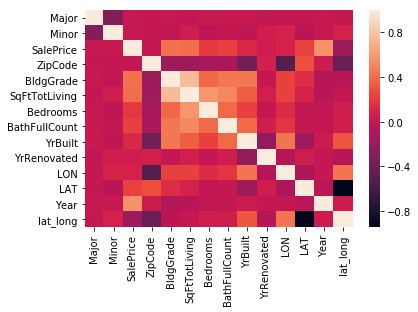

In [56]:
sns.heatmap(sales_data.corr())

Moreover, the correlation shows that ZipCodes aren't correlated to SalePrice. However, we know that can't be true because location is almost always the most important parameter when calculating the SalePrice of a house. Therefore, we are going to use one hot encoding to turn numerical categorical data into features with nominal value.

## Step 7: Dumming the ZipCodes column

In [57]:
from sklearn.preprocessing import OneHotEncoder

sales_dfwm = sales_data

sales_cdfwm = sales_data

<b>7.1 Experimenting with grouping ZipCodes into cities

king_zipcode_data = pd.read_csv('raw_data/king_zipcode.csv')

king_zipcode_data.head()

king_zipcode_data.drop(columns=['State', 'County Name', 'Zipcode name'], axis=1, inplace=True)

king_zipcode_data = king_zipcode_data.rename(columns={'Zipcode': 'ZipCode'})

sales_cdfwm = sales_cdfwm.reset_index()

sales_cdfwm = pd.merge(sales_cdfwm, king_zipcode_data, on=['ZipCode'], how='left')

sales_cdfwm[sales_cdfwm['City'].isnull()]

sales_cdfwm = sales_cdfwm.loc[~sales_cdfwm['City'].isna(), :]

sales_cdfwm['City'].value_counts()

c_zipcodes = sales_cdfwm["City"].values.reshape(-1, 1)
zipcodes[:10]

encoder = OneHotEncoder().fit(c_zipcodes)

encoder.categories_

ohe = pd.DataFrame(encoder.transform(c_zipcodes).toarray(),
                   columns=encoder.get_feature_names(["City"]))

ohe.head()

sales_cdfwm = sales_cdfwm.drop("City", axis=1)

sales_cdfwm = pd.concat([sales_cdfwm, ohe], axis=1)

sales_cdfwm.head()

sales_cdfwm.corr()['SalePrice']

<b> 7.2: ZipCode Exploration

In [58]:
sales_data["ZipCode"].value_counts()

98042.0    25180
98023.0    22945
98115.0    21818
98038.0    20506
98052.0    20387
98034.0    19923
98058.0    19099
98117.0    18569
98103.0    18221
98006.0    18005
98074.0    16359
98118.0    16326
98133.0    16290
98155.0    15400
98001.0    15298
98031.0    15070
98059.0    15068
98033.0    14822
98056.0    14344
98092.0    14226
98125.0    13778
98003.0    13221
98168.0    12488
98030.0    11867
98198.0    11807
98075.0    11788
98178.0    11104
98008.0    11049
98027.0    10855
98126.0    10818
           ...  
98068.0      135
98000.0       46
98113.0       13
98134.0       10
98104.0        5
98035.0        4
98121.0        4
98083.0        4
98097.0        4
98189.0        3
98157.0        3
98017.0        3
98043.0        3
98302.0        2
98132.0        2
98009.0        2
98111.0        2
98422.0        2
98079.0        2
98405.0        2
98026.0        2
98063.0        2
98013.0        1
98018.0        1
98021.0        1
98025.0        1
98176.0        1
98054.0       

In [59]:
sales_data["ZipCode"].unique()

array([98002., 98092., 98008., 98058., 98038., 98031., 98188., 98051.,
       98001., 98072., 98106., 98059., 98125., 98006., 98144., 98070.,
       98155., 98045., 98133., 98105., 98102., 98042., 98053., 98168.,
       98027., 98011., 98115., 98074., 98003., 98024., 98117., 98029.,
       98005., 98028., 98103., 98034., 98030., 98032., 98039., 98075.,
       98022., 98040., 98199., 98177., 98108., 98118., 98065., 98166.,
       98136., 98023., 98055., 98033., 98077., 98119., 98122., 98116.,
       98146., 98052., 98112., 98007., 98107., 98004., 98198., 98010.,
       98056., 98019., 98014., 98178., 98126., 98148., 98047., 98109.,
       98224., 98354., 98068., 98288., 98050., 98083., 98057., 98302.,
       98121., 98113., 98000., 98035., 98134., 98422., 98132., 98104.,
       98026., 98043., 98157., 98097., 98189., 98017., 98044., 98025.,
       98111., 98018., 98079., 98021., 98405., 98009., 98063., 98013.,
       98176., 98101., 98054.])

In [60]:
zipcodes = sales_dfwm["ZipCode"].values.reshape(-1, 1)

In [61]:
encoder = OneHotEncoder().fit(zipcodes)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [62]:
encoder.categories_

[array([98000., 98001., 98002., 98003., 98004., 98005., 98006., 98007.,
        98008., 98009., 98010., 98011., 98013., 98014., 98017., 98018.,
        98019., 98021., 98022., 98023., 98024., 98025., 98026., 98027.,
        98028., 98029., 98030., 98031., 98032., 98033., 98034., 98035.,
        98038., 98039., 98040., 98042., 98043., 98044., 98045., 98047.,
        98050., 98051., 98052., 98053., 98054., 98055., 98056., 98057.,
        98058., 98059., 98063., 98065., 98068., 98070., 98072., 98074.,
        98075., 98077., 98079., 98083., 98092., 98097., 98101., 98102.,
        98103., 98104., 98105., 98106., 98107., 98108., 98109., 98111.,
        98112., 98113., 98115., 98116., 98117., 98118., 98119., 98121.,
        98122., 98125., 98126., 98132., 98133., 98134., 98136., 98144.,
        98146., 98148., 98155., 98157., 98166., 98168., 98176., 98177.,
        98178., 98188., 98189., 98198., 98199., 98224., 98288., 98302.,
        98354., 98405., 98422.])]

In [63]:
ohe = pd.DataFrame(encoder.transform(zipcodes).toarray(),
                   columns=encoder.get_feature_names(["ZipCode"]))

ohe.head()

,ZipCode_98000.0,ZipCode_98001.0,ZipCode_98002.0,ZipCode_98003.0,ZipCode_98004.0,ZipCode_98005.0,ZipCode_98006.0,ZipCode_98007.0,ZipCode_98008.0,ZipCode_98009.0,...,ZipCode_98188.0,ZipCode_98189.0,ZipCode_98198.0,ZipCode_98199.0,ZipCode_98224.0,ZipCode_98288.0,ZipCode_98302.0,ZipCode_98354.0,ZipCode_98405.0,ZipCode_98422.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
sales_dfwm = sales_dfwm.drop(columns=["ZipCode"])

In [65]:
sales_dfwm = sales_dfwm.reset_index()

In [66]:
sales_dfwm = pd.concat([sales_dfwm, ohe], axis=1)

In [67]:
sales_dfwm.shape

(768513, 122)

In [68]:
sales_dfwm.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Year               0.560754
BldgGrade          0.419113
SqFtTotLiving      0.401447
LAT                0.234124
BathFullCount      0.230026
Bedrooms           0.191669
YrBuilt            0.113272
ZipCode_98075.0    0.105831
ZipCode_98040.0    0.096541
ZipCode_98053.0    0.080785
LON                0.075118
ZipCode_98006.0    0.073280
ZipCode_98112.0    0.069631
ZipCode_98004.0    0.066434
ZipCode_98074.0    0.064607
ZipCode_98199.0    0.060024
ZipCode_98033.0    0.053934
ZipCode_98119.0    0.051395
ZipCode_98052.0    0.050955
ZipCode_98077.0    0.050795
ZipCode_98105.0    0.047044
ZipCode_98027.0    0.047028
YrRenovated        0.046590
ZipCode_98102.0    0.045717
ZipCode_98005.0    0.044796
ZipCode_98109.0    0.043620
ZipCode_98029.0    0.042506
ZipCode_98065.0    0.041006
ZipCode_98039.0    0.034028
                     ...   
ZipCode_98056.0   -0.015090
ZipCode_98288.0   -0.015639
ZipCode_98010.0   -0.019010
ZipCode_98038.0   -0.023132
index             -0

## Step 8: Running a simple linear regression

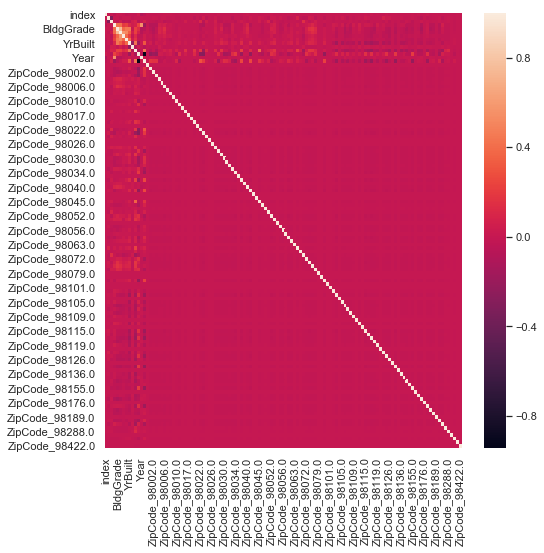

In [69]:
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(sales_dfwm.corr())

<b>7.1 Normalisation of variables

In [70]:
sales_dfwm['SqFtTotLiving'] = np.log(sales_dfwm['SqFtTotLiving'])

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Normalized data')

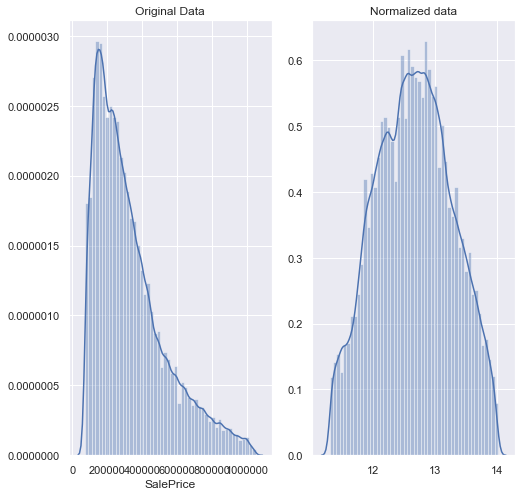

In [71]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(sales_dfwm['SalePrice'])
 
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(sales_dfwm['SalePrice'], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

In [84]:
X = sales_dfwm[['SqFtTotLiving', 'BathFullCount', 'LAT', 'LON', 'lat_long', 'Bedrooms', 'YrBuilt', 'YrRenovated', 'ZipCode_98075.0'
                , 'ZipCode_98053.0', 'ZipCode_98040.0', 'ZipCode_98074.0', 'ZipCode_98006.0', 'ZipCode_98112.0'
                , 'ZipCode_98065.0', 'ZipCode_98077.0', 'ZipCode_98199.0', 'ZipCode_98052.0', 'ZipCode_98004.0'
                , 'ZipCode_98027.0', 'ZipCode_98119.0', 'ZipCode_98029.0', 'ZipCode_98105.0', 'ZipCode_98033.0'
                , 'ZipCode_98102.0', 'ZipCode_98109.0', 'ZipCode_98005.0', 'ZipCode_98072.0', 'ZipCode_98116.0'
                , 'ZipCode_98103.0']]
y = sales_dfwm['SalePrice']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c50a73ac8>,
      dtype=object)

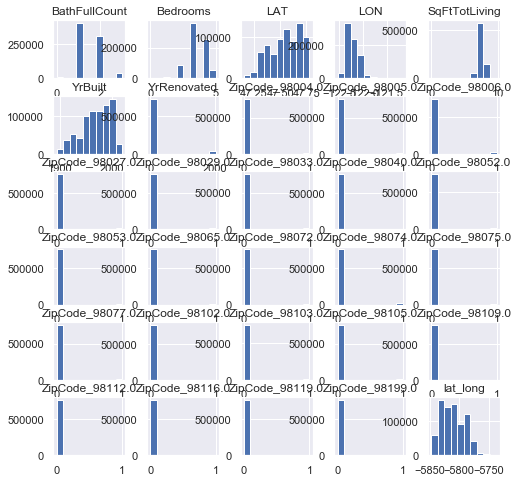

In [85]:
X.hist()

<b>7.2 Multiple Linear Regression Using OLS In Statsmodel

In [86]:
predictors = np.asarray(X)
predictors_int = sm.add_constant(predictors)
model = sm.OLS(y, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     7494.
Date:                Fri, 12 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:33:03   Log-Likelihood:            -1.0384e+07
No. Observations:              768513   AIC:                         2.077e+07
Df Residuals:                  768482   BIC:                         2.077e+07
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.323e+09   7.19e+07     32.296      0.000    2.18e+09    2.46e+09
x1          1.652e+05    746.140    221.452      0.000    1.64e+05    1.67e+05
x2          1.331e+04    409.794     32.489      0.000    1.25e+04    1.41e+04
x3           -4.9e+07   1.51e+06    -32.354      0.000    -5.2e+07    -4.6e+07
x4          1.911e+07   5.88e+05     32.475      0.000     1.8e+07    2.03e+07
x5         -4.028e+05   1.24e+04    -32.513      0.000   -4.27e+05   -3.79e+05
x6         -1.277e+04    324.034    -39.412      0.000   -1.34e+04   -1.21e+04
x7           308.9898      9.733     31.746      0.000     289.913     328.067
x8             9.1626      0.504     18.194      0.000       8.176      10.150
x9          1.214e+05   1755.764     69.126      0.000    1.18e+05    1.25e+05
x10         9.592e+04   1908.616     50.255      0.000    9.22e+04    9.97e+04
x11         1.566e+05   2090.439     74.903      0.000    1.52e+05    1.61e+05
x12         5.575e+04   1529.493     36.452      0.000    5.28e+04    5.88e+04
x13         7.271e+04   1382.298     52.604      0.000       7e+04    7.54e+04
x14         1.275e+05   2105.296     60.544      0.000    1.23e+05    1.32e+05
x15           9.3e+04   2363.162     39.353      0.000    8.84e+04    9.76e+04
x16         2.923e+04   2180.241     13.407      0.000     2.5e+04    3.35e+04
x17         8.479e+04   1882.818     45.032      0.000    8.11e+04    8.85e+04
x18         3.685e+04   1368.911     26.920      0.000    3.42e+04    3.95e+04
x19         9.112e+04   2263.358     40.257      0.000    8.67e+04    9.56e+04
x20         7.158e+04   1774.736     40.334      0.000    6.81e+04    7.51e+04
x21         1.142e+05   2437.737     46.837      0.000    1.09e+05    1.19e+05
x22         6.468e+04   1838.331     35.184      0.000    6.11e+04    6.83e+04
x23         8.375e+04   1960.355     42.721      0.000    7.99e+04    8.76e+04
x24         4.768e+04   1530.703     31.147      0.000    4.47e+04    5.07e+04
x25         1.454e+05   3555.308     40.908      0.000    1.38e+05    1.52e+05
x26         1.212e+05   3147.581     38.495      0.000    1.15e+05    1.27e+05
x27         7.349e+04   2545.875     28.865      0.000    6.85e+04    7.85e+04
x28         -208.8306   1927.608     -0.108      0.914   -3986.878    3569.217
x29         8.257e+04   1779.240     46.408      0.000    7.91e+04    8.61e+04
x30         5.183e+04   1395.994     37.130      0.000    4.91e+04    5.46e+04
==============================================================================
Omnibus:                    84526.685   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           122751.456
Skew:                           0.843   Prob(JB):                         0.00
Kurtosis:                       3.997   Cond. No.                     2.17e+09
==

<b>7.2 Multiple Linear Regression Using Sklearn

In [87]:
np.random.seed(33)

# Now let's split our data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

In [88]:
# Let's create a StandardScaler object to scale our data for us.
ss = StandardScaler()

# Now we'll apply it to our data by using the .fit_transform() method.

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [89]:
# Now we can fit the LinearRegression object to our training data!

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
lr.score(ss.transform(X_test), y_test)

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.22577544890791346

In [91]:
# We can use the .coef_ attribute to recover the results
# of the regression.

lr.coef_

array([ 6.74189369e+04,  8.36904824e+03, -6.91460606e+06,  2.55483532e+06,
       -7.66409352e+06, -1.05011303e+04,  8.64336540e+03,  4.10291599e+03,
        1.48041306e+04,  1.11987217e+04,  1.53772825e+04,  8.09087792e+03,
        1.12168752e+04,  1.25037461e+04,  8.48422144e+03,  3.17928536e+03,
        9.37880482e+03,  6.02392363e+03,  8.48788173e+03,  8.53128223e+03,
        9.65416680e+03,  7.55008245e+03,  8.86617734e+03,  6.48375065e+03,
        8.52435905e+03,  7.84313095e+03,  5.94863558e+03,  1.53201160e+02,
        9.51328675e+03,  7.82001703e+03])

<b> SKlearn Metrics

In [92]:
metrics.r2_score(y_test, lr.predict(ss.transform(X_test)))

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


0.22577544890791346

In [93]:
metrics.mean_absolute_error(y_test, lr.predict(ss.transform(X_test)))

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


137065.77359537032

In [94]:
np.sqrt(metrics.mean_squared_error(y_test, lr.predict(ss.transform(X_test))))

/Users/jjherranzsarrion/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


178233.80812274158